# Preprocessing - Encoding

<b> Encoding이 필요한 이유 </b>

머신러닝 알고리즘에서 문자열을 입력값으로 넣을 수 없다. 따라서 Numeric한 값으로 바꿔줘야 한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. One-Hot Encoding

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
pd.get_dummies(df['sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


<b> 장점 </b>

피처내 값들이 서로 분리 되어있기 때문에, 우리가 모를 수 있는 어떤 관계나 영향을 주지 않는다.

구현하기가 쉽다.

<b> 단점 </b>

피처 내 값의 종류가 많을 경우 (Cardinality가 높다고 함),  매우 많은 Feature 들을 만들어 낸다.

이는, 모델 훈련의 속도를 낮추고 훈련에 더 많은 데이터를 필요로 하게 한다 => 차원의 저주 문제(The curse of dimensionality)

단순히 0과 1로만 결과를 내어 큰 정보이득 없이 Tree 의 depth만 깊게 만든다.

One-hot Encoding으로 생성된 Feature의 수가 많다면, 트리 계열 알고리즘(Random Forest, xgboost, lighGBM)처럼 일부 Feature들만 추출하는 경우에 생성된 Feature들이 다른 Feature 들 보다 더 많이 쓰인다.

### 2. Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex_labeled'] = label_encoder.fit_transform(df['sex'])
df[['sex', 'sex_labeled']].head()

,sex,sex_labeled
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


<b> 장점 </b>

One-hot 와 같이 많은 Feature를 만들지 않고, 하나의 Feature만 만든다.

One-hot 보다 학습속도가 빠르고, One-hot 의 문제를 어느정도 해결한다.

sklearn을 통해 구현하기가 매우 쉽다.

<b> 단점 </b>

Feature 내에 피처 값들을 Numerical한 형태(1,2,3...)로  인코딩 된다.

그 결과 값들이 순서 개념이 없음에도, 모델은 순서 개념을 전제하여 학습하게 된다.

선형 모델에서는 좋지 않다.

### 3. Mean Encoding

<b> 목적 </b> 
    
Mean Encoding은 0,1,..등의 단순 구분을 넘어 예측에 의미있는 Encoding을 하려고 한다.

생성한 Feature와 예측하고자 하는 Target 간의 어떤 수치적인 관계를 카테고리 데이터에서도 찾고자 하는 것이다.

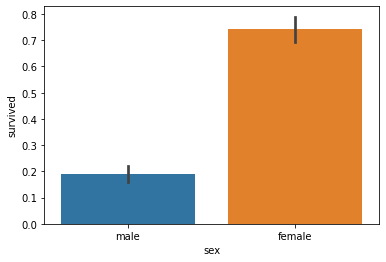

In [5]:
sns.barplot(x = 'sex', y= 'survived', data = df)
plt.show()

In [6]:
y_target = df['survived']
sex_mean = df.groupby('sex')['survived'].mean()
pd.DataFrame(sex_mean)

,survived
sex,
female,0.742038
male,0.188908


In [7]:
df['sex_mean'] = df['sex'].map(sex_mean)
df[['sex', 'sex_mean']]

,sex,sex_mean
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908
...,...,...
886,male,0.188908
887,female,0.742038
888,female,0.742038
889,male,0.188908


<b> 장점 </b>

만들어지는 Feature 수가 적어, One-hot encoding의 문제였던 차원의 저주가 없다.

비교적 빠른 학습이 이루어진다.

회귀, 분류에서 Mean encoding으로 생성된 Feature는 예측 값에 더 가깝게 학습되게 한다.

<b> 단점 </b>

구현과 검증이 다른 인코딩과 비교해서 어렵다.

오버피팅의 문제가 있다.